In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [100]:
import warnings
warnings.filterwarnings('ignore')

## Leitura do *dataset*

In [4]:
dfX_train = pd.read_csv('./dados/X_train.csv', header=None)
dfy_train = pd.read_csv('./dados/y_train.csv', header=None)

dfX_test = pd.read_csv('./dados/X_test.csv', header=None)
dfy_test = pd.read_csv('./dados/y_test.csv', header=None)

In [8]:
X_train = dfX_train.values
X_test = dfX_test.values

In [9]:
X_train.shape

(431044, 7)

In [10]:
X_test.shape

(117034, 7)

In [11]:
y_train = dfy_train.values
y_test = dfy_test.values

In [12]:
y_train.shape

(431044, 1)

In [13]:
y_test.shape

(117034, 1)

In [85]:
classes = ['sem chuva', 'chuva fraca', 'chuva moderada', 'chuva forte']

## Cross-validation

In [14]:
kfold = model_selection.KFold(n_splits=3)

## Gráficos

Matriz de confusão

In [204]:
def plot_confusion_matrix(label_test, label_pred):
    classes = ['sem chuva', 'chuva fraca', 'chuva moderada', 'chuva forte']
    conf_matrix = confusion_matrix(label_test, label_pred)
    conf_matrix_recall = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    conf_matrix_prec = conf_matrix.astype('float') / conf_matrix.sum(axis=0)[np.newaxis,:]
    
    conf_df = pd.DataFrame(conf_matrix, index=classes, columns=classes)
    conf_recall_df = pd.DataFrame(conf_matrix_recall, index=classes, columns=classes)
    conf_prec_df = pd.DataFrame(conf_matrix_prec, index=classes, columns=classes)
    
    f, (ax0,ax1,ax2) = plt.subplots(ncols=3, nrows=1, figsize=(15, 6));
    plt.figure(figsize = (8,6));
    heatmap = sn.heatmap(conf_df, annot=True, annot_kws={"size": 13}, cmap='Blues', fmt='g', ax=ax0, square=True, cbar=False);
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12);
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12);
    heatmap.set_ylabel('Real', fontsize=14);
    heatmap.set_xlabel('Previsto', fontsize=14);
    ax0.set_title('Matriz de Confusão', fontsize=16);
    
    #recall
    heatmap_recall = sn.heatmap(conf_recall_df, annot=True, annot_kws={"size": 13}, yticklabels=False, cmap='Blues', 
                              fmt='.2%', ax=ax1, square=True, cbar=False);
    heatmap_recall.yaxis.set_ticklabels(heatmap_recall.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12);
    heatmap_recall.xaxis.set_ticklabels(heatmap_recall.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12);
    heatmap_recall.set_xlabel('Previsto', fontsize=14);
    ax1.set_title('% de Revocação', fontsize=16);
    
    #precision
    heatmap_prec = sn.heatmap(conf_prec_df, annot=True, annot_kws={"size": 13}, yticklabels=False, cmap='Blues', 
                              fmt='.2%', ax=ax2, square=True, cbar=False);
    heatmap_prec.yaxis.set_ticklabels(heatmap_prec.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12);
    heatmap_prec.xaxis.set_ticklabels(heatmap_prec.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12);
    heatmap_prec.set_xlabel('Previsto', fontsize=14);
    ax2.set_title('% de Precisão', fontsize=16);

Taxa de Erro

In [180]:
def plot_metric_error(data, x_label, y_label):
    df_error = pd.DataFrame(data).T
    df_error.columns = [x_label, y_label]
    plot1 = df_error.plot(x=x_label, y=y_label, linewidth = 3, figsize = (8,6), color = ['lightgreen'], grid = True);
    plot1.set_xlabel(x_label, fontsize = 12);
    plot1.set_ylabel('Taxa de erro', fontsize = 12);
    plot1.set_title('Avaliação de hiperparâmetros', fontsize = 16);

## K-NN

Otimização de hiperparâmetros com validação-cruzada
- hiperparâmetro:  valores de vizinhos (k) (`n_neighbors`)

In [16]:
knn = KNeighborsClassifier()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range) # valores de k
grid = model_selection.GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')

In [17]:
grid.fit(X_train, y_train.flatten())

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [82]:
print('Melhor valor de K = ', grid.best_params_)
print('Acurácia = ', grid.best_score_)

Melhor valor de K =  {'n_neighbors': 1}
Acurácia =  0.9345774445300248


In [177]:
mean_error_knn = [1.- result for result in grid.cv_results_['mean_test_score']]

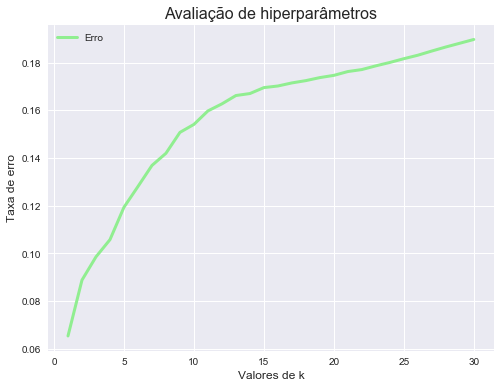

In [181]:
plot_metric_error([k_range,mean_error_knn], 'Valores de k', 'Erro')

Avaliação da validação-cruzada com melhores parâmetros

In [79]:
knn = KNeighborsClassifier(n_neighbors=1)
knn_results = model_selection.cross_val_score(knn, X_train, y_train.flatten(), cv=kfold)

In [80]:
print('Acurácia 3-k-fold', knn_results)
print('Acurácia Média = {0:.3f}'.format(knn_results.mean()))

Acurácia 3-k-fold [0.84789326 0.89136351 0.91057969]
Acurácia Média = 0.883


Treinamento e predição do modelo com melhor parâmetro

In [35]:
knn.fit(X_train, y_train.flatten())
y_test_pred_knn = knn.predict(X_test)

In [39]:
print('Acurária de teste: {0:.2f}'.format(accuracy_score(y_test, y_test_pred_knn)))

Acurária de teste: 0.92


O classificador K-NN com valor de k=1 forneceu uma acurácia de 92,0% para o dataset de teste.

In [41]:
print(classification_report(y_test, y_test_pred_knn, target_names=classes))

                precision    recall  f1-score   support

     sem chuva       0.96      0.94      0.95     50712
   chuva fraca       0.92      0.89      0.90     44792
chuva moderada       0.88      0.93      0.91     21503
   chuva forte       0.03      0.81      0.06        27

   avg / total       0.93      0.92      0.92    117034



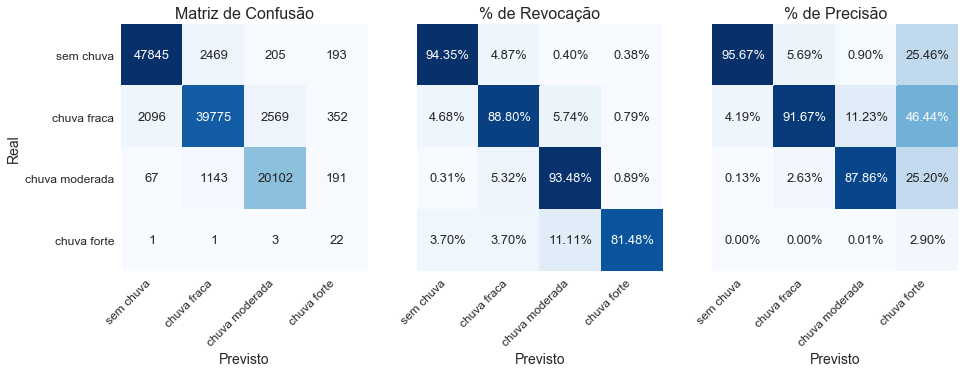

<Figure size 576x432 with 0 Axes>

In [205]:
plot_confusion_matrix(y_test, y_test_pred_knn)

## Ensembles

In [45]:
def plot_error(train_err, test_err):
    df_error = pd.DataFrame([train_err, test_err]).T
    df_error.columns = ['Treinamento', 'Teste']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6), color = ['lightgreen','darkgreen'], grid = True);
    plot1.set_xlabel('Número de árvores', fontsize = 12);
    plot1.set_ylabel('Taxa de erro', fontsize = 12);
    plot1.set_title('Taxa de erro x número de árvores', fontsize = 16);
    plt.axhline(y=test_err[0], linewidth=1, color = 'orange', ls = 'dashed');

### Random Forest

Otimização de hiperparâmetros com validação-cruzada
- hiperparâmetro:  número de árvores (`n_estimators`)

In [93]:
rf_clf = RandomForestClassifier()
n_arvore = [x for x in range(10, 210, 10)] # numero de arvores
param_grid = dict(n_estimators=n_arvore)
grid_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, scoring='accuracy')

In [94]:
%%time
grid_rf.fit(X_train, y_train.flatten())

Wall time: 59min 47s


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [111]:
print('Melhor número de árvores = ', grid_rf.best_params_)
print('Acurácia = ', grid_rf.best_score_)

Melhor número de árvores =  {'n_estimators': 190}
Acurácia =  0.966736574456436


In [173]:
mean_error_rf = [1.- result.mean_validation_score for result in grid_rf.grid_scores_]

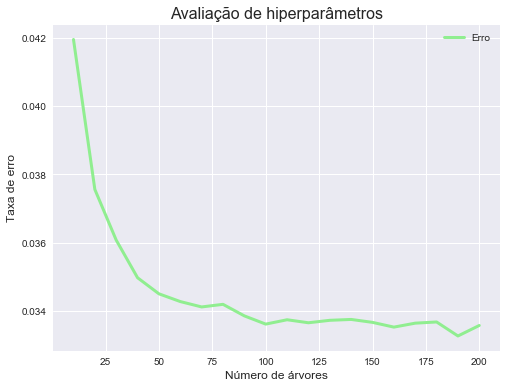

In [184]:
plot_metric_error([n_arvore, mean_error_rf], 'Número de árvores', 'Erro')

Avaliação da validação-cruzada com melhor parâmetro

In [115]:
%%time
rf_clf = RandomForestClassifier(n_estimators=190)
rf_clf_results = model_selection.cross_val_score(rf_clf, X_train, y_train.flatten(), cv=kfold)

Wall time: 5min 40s


In [117]:
print('Acurácia 3-k-fold', rf_clf_results)
print('Acurácia Média = {0:.3f}'.format(rf_clf_results.mean()))

Acurácia 3-k-fold [0.93976281 0.94523284 0.88035996]
Acurácia Média = 0.922


Treinamento e predição do modelo com melhor parâmetro

In [118]:
%%time
rf_clf.fit(X_train, y_train.flatten())
y_test_pred_rf_clf = rf_clf.predict(X_test)

Wall time: 2min 58s


In [129]:
print('Acurária de teste: {0:.2f}'.format(accuracy_score(y_test, y_test_pred_rf_clf)))

Acurária de teste: 0.96


O classificador Random Forests com número de árvores = 190 forneceu uma acurácia de 96,0% para o dataset de teste.

In [130]:
print(classification_report(y_test, y_test_pred_rf_clf, target_names=classes))

                precision    recall  f1-score   support

     sem chuva       0.97      0.97      0.97     50712
   chuva fraca       0.95      0.95      0.95     44792
chuva moderada       0.96      0.97      0.96     21503
   chuva forte       1.00      1.00      1.00        27

   avg / total       0.96      0.96      0.96    117034



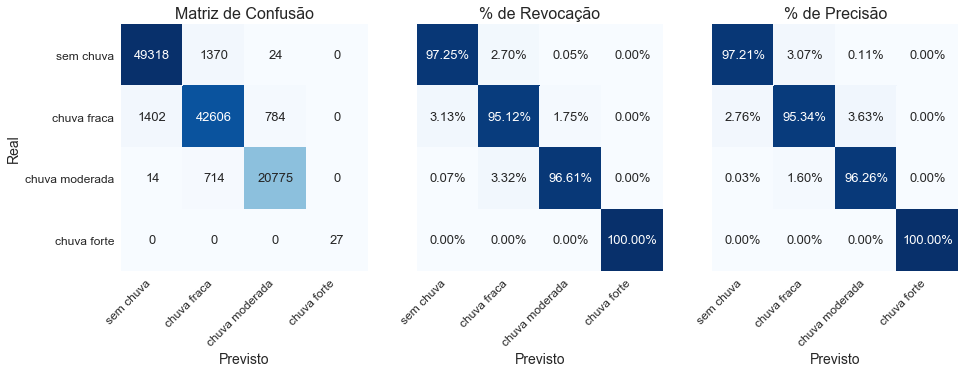

<Figure size 576x432 with 0 Axes>

In [206]:
plot_confusion_matrix(y_test, y_test_pred_rf_clf)

### AdaBoost

In [132]:
ada_clf = AdaBoostClassifier()
n_arvore = [x for x in range(10, 210, 10)] # numero de arvores
param_grid = dict(n_estimators=n_arvore)
grid_ada = model_selection.GridSearchCV(ada_clf, param_grid, cv=3, scoring='accuracy')

In [135]:
%%time
grid_ada.fit(X_train, y_train.flatten())

Wall time: 33min 22s


GridSearchCV(cv=3, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [136]:
print('Melhor número de árvores = ', grid_ada.best_params_)
print('Acurácia = ', grid_ada.best_score_)

Melhor número de árvores =  {'n_estimators': 30}
Acurácia =  0.6346080678538618


In [138]:
mean_error_ada = [1.- result for result in grid_ada.cv_results_['mean_test_score']]

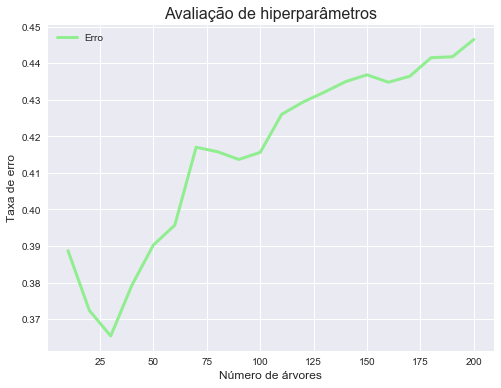

In [186]:
plot_metric_error([n_arvore, mean_error_ada], 'Número de árvores', 'Erro')

Avaliação da validação-cruzada com melhor parâmetro

In [140]:
%%time
ada_clf = AdaBoostClassifier(n_estimators=30)
ada_clf_results = model_selection.cross_val_score(ada_clf, X_train, y_train.flatten(), cv=kfold)

Wall time: 25.9 s


In [141]:
print('Acurácia 3-k-fold', ada_clf_results)
print('Acurácia Média = {0:.3f}'.format(ada_clf_results.mean()))

Acurácia 3-k-fold [0.53381774 0.43250673 0.28299497]
Acurácia Média = 0.416


Treinamento e predição do modelo com melhor parâmetro

In [142]:
%%time
ada_clf.fit(X_train, y_train.flatten())
y_test_pred_ada_clf = ada_clf.predict(X_test)

Wall time: 13.8 s


In [144]:
print('Acurária de teste: {0:.2f}'.format(accuracy_score(y_test, y_test_pred_ada_clf)))

Acurária de teste: 0.54


O classificador AdaBoost com número de árvores = 30 forneceu uma acurácia de 54,0% para o dataset de teste.

In [148]:
print(classification_report(y_test, y_test_pred_ada_clf, target_names=classes))

                precision    recall  f1-score   support

     sem chuva       0.57      0.87      0.69     50712
   chuva fraca       0.51      0.16      0.25     44792
chuva moderada       0.45      0.52      0.48     21503
   chuva forte       0.24      0.89      0.38        27

   avg / total       0.53      0.54      0.48    117034



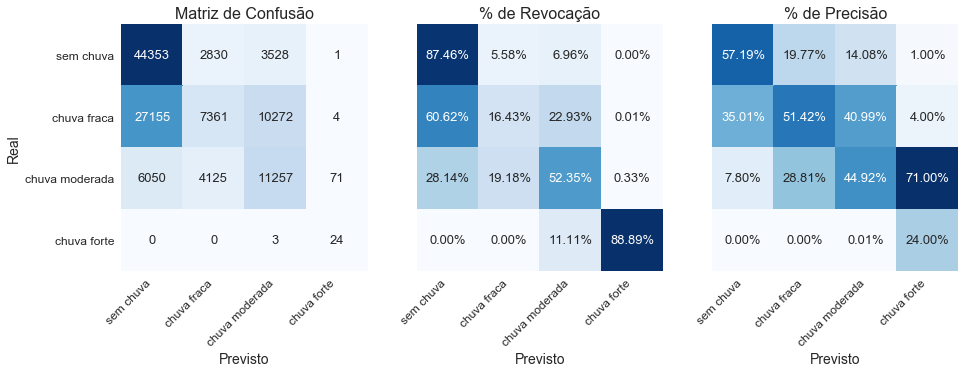

<Figure size 576x432 with 0 Axes>

In [207]:
plot_confusion_matrix(y_test, y_test_pred_ada_clf)

## Rede Neural

In [34]:
tf.logging.set_verbosity(tf.logging.INFO)

In [74]:
def dense_model(features, labels, mode):
    # tensor de entrada
    input_layer = tf.reshape(features['x'], [-1, features['x'].shape[1]])

    # camdas densas ocultas (rede completamente conectada)
    dense_hidden_1 = tf.layers.dense(inputs=input_layer, units=2048, activation=tf.nn.relu)

    dropout_1 = tf.layers.dropout(inputs=dense_hidden_1, rate=0.6, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    dense_hidden_2 = tf.layers.dense(inputs=dropout_1, units=2048, activation=tf.nn.relu)
    
    dropout_2 = tf.layers.dropout(inputs=dense_hidden_2, rate=0.6, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    dense_hidden_3 = tf.layers.dense(inputs=dropout_2, units=1024, activation=tf.nn.relu)
    
    dropout_3 = tf.layers.dropout(inputs=dense_hidden_3, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

    # camda saída
    dense_output = tf.layers.dense(inputs=dropout_3, units=4)

    predictions = {
      'classes': tf.argmax(input=dense_output, axis=1),
      'probabilidades': tf.nn.softmax(dense_output, name='softmax_tensor')
    }

    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

    # cálculo do custo
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=dense_output)
 
    # otimização do custo na etapa de treinamento
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.AdamOptimizer(learning_rate=0.03)
        train_op = optimizer.minimize(loss=loss, global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    # métricas de avaliação na etapa de teste
    test_metric_ops = {'acurácia': tf.metrics.accuracy(labels=labels, predictions=predictions['classes'])}
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=test_metric_ops)

Criação do estimador, uma classe do TensorFlow para realizar treinamento e avaliação do modelo. O argumento `model_fn` especifica a função do modelo a ser usada para treinamento, avaliação e previsão. Sendo assim, utilizou-se a função `dense_model` criada anteriormente.

In [75]:
dense_classifier = tf.estimator.Estimator(model_fn=dense_model, model_dir="./dense_model_d7")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './dense_model_d7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000000016E384E0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Configuração do log para acompanhar o progresso durante o treinamento.

In [76]:
tensors_to_log = {'probabilidades': 'softmax_tensor'}
logging_hook = tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=50)

Treinamento do modelo

In [77]:
train_input = tf.estimator.inputs.numpy_input_fn(x={'x': X_train}, y=y_train.flatten(), num_epochs=None, 
                                                 batch_size=1000, shuffle=True)
dense_classifier.train(input_fn=train_input, steps=20000, hooks=[logging_hook])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into ./dense_model_d7\model.ckpt.
INFO:tensorflow:probabilidades = [[0.         0.43624998 0.         0.56375002]
 [0.00000125 0.99792929 0.00206946 0.        ]
 [1.         0.         0.         0.        ]
 ...
 [0.99987588 0.         0.00012411 0.        ]
 [1.         0.         0.         0.        ]
 [0.         0.         1.         0.        ]]
INFO:tensorflow:loss = 96.97895812988281, step = 1
INFO:tensorflow:probabilidades = [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]] (46.040 sec)
INFO:tensorflow:global_step/sec: 1.12751
INFO:tensorflow:probabilidades = [[0.4046887  0.37121894 0.15917403 0.06491833]
 [0.5613971  0.18243012 0.25025977 0.005913  ]
 [0.40

INFO:tensorflow:loss = 1.1361221075057983, step = 1001 (95.939 sec)
INFO:tensorflow:probabilidades = [[0.43041406 0.36716578 0.14476208 0.05765809]
 [0.43041406 0.36716578 0.14476208 0.05765809]
 [0.43041406 0.36716578 0.14476208 0.05765809]
 ...
 [0.43041406 0.36716578 0.14476208 0.05765809]
 [0.43041406 0.36716578 0.14476208 0.05765809]
 [0.43041406 0.36716578 0.14476208 0.05765809]] (50.339 sec)
INFO:tensorflow:global_step/sec: 0.977362
INFO:tensorflow:probabilidades = [[0.42691065 0.37165761 0.15943192 0.04199982]
 [0.42691065 0.37165761 0.15943192 0.04199982]
 [0.42691065 0.37165761 0.15943192 0.04199982]
 ...
 [0.42691065 0.37165761 0.15943192 0.04199982]
 [0.42691065 0.37165761 0.15943192 0.04199982]
 [0.42691065 0.37165761 0.15943192 0.04199982]] (51.941 sec)
INFO:tensorflow:loss = 1.0911149978637695, step = 1101 (102.281 sec)
INFO:tensorflow:probabilidades = [[0.42761289 0.37410337 0.16583774 0.03244601]
 [0.42761289 0.37410337 0.16583774 0.03244601]
 [0.42761289 0.37410337 0.

INFO:tensorflow:global_step/sec: 1.14845
INFO:tensorflow:probabilidades = [[0.02472913 0.04888644 0.91066202 0.01572241]
 [0.02472913 0.04888644 0.91066202 0.01572241]
 [0.02472913 0.04888644 0.91066202 0.01572241]
 ...
 [0.02472913 0.04888644 0.91066202 0.01572241]
 [0.02472913 0.04888644 0.91066202 0.01572241]
 [0.02472913 0.04888644 0.91066202 0.01572241]] (43.798 sec)
INFO:tensorflow:loss = 4.144554138183594, step = 2101 (87.076 sec)
INFO:tensorflow:probabilidades = [[0.03730589 0.06693444 0.16475771 0.73100196]
 [0.03730589 0.06693444 0.16475771 0.73100196]
 [0.03730589 0.06693444 0.16475771 0.73100196]
 ...
 [0.03730589 0.06693444 0.16475771 0.73100196]
 [0.03730589 0.06693444 0.16475771 0.73100196]
 [0.03730589 0.06693444 0.16475771 0.73100196]] (43.327 sec)
INFO:tensorflow:global_step/sec: 1.16932
INFO:tensorflow:probabilidades = [[0.01402791 0.02434093 0.04801934 0.91361182]
 [0.01402791 0.02434093 0.04801934 0.91361182]
 [0.01402791 0.02434093 0.04801934 0.91361182]
 ...
 [0.

INFO:tensorflow:loss = 1.6733336448669434, step = 3101 (79.647 sec)
INFO:tensorflow:probabilidades = [[0.41990003 0.35687047 0.12298909 0.1002404 ]
 [0.41990003 0.35687047 0.12298909 0.1002404 ]
 [0.41990003 0.35687047 0.12298909 0.1002404 ]
 ...
 [0.41990003 0.35687047 0.12298909 0.1002404 ]
 [0.41990003 0.35687047 0.12298909 0.1002404 ]
 [0.41990003 0.35687047 0.12298909 0.1002404 ]] (39.597 sec)
INFO:tensorflow:global_step/sec: 1.22894
INFO:tensorflow:probabilidades = [[0.43133165 0.36618809 0.14126825 0.06121201]
 [0.43133165 0.36618809 0.14126825 0.06121201]
 [0.43133165 0.36618809 0.14126825 0.06121201]
 ...
 [0.43133165 0.36618809 0.14126825 0.06121201]
 [0.43133165 0.36618809 0.14126825 0.06121201]
 [0.43133165 0.36618809 0.14126825 0.06121201]] (41.785 sec)
INFO:tensorflow:loss = 1.1020361185073853, step = 3201 (81.381 sec)
INFO:tensorflow:probabilidades = [[0.42598079 0.37184409 0.15759089 0.04458422]
 [0.42598079 0.37184409 0.15759089 0.04458422]
 [0.42598079 0.37184409 0.15

INFO:tensorflow:Saving checkpoints for 4170 into ./dense_model_d7\model.ckpt.
INFO:tensorflow:global_step/sec: 1.20835
INFO:tensorflow:probabilidades = [[0.15074831 0.62367674 0.19592028 0.02965467]
 [0.15074831 0.62367674 0.19592028 0.02965467]
 [0.15074831 0.62367674 0.19592028 0.02965467]
 ...
 [0.15074831 0.62367674 0.19592028 0.02965467]
 [0.15074831 0.62367674 0.19592028 0.02965467]
 [0.15074831 0.62367674 0.19592028 0.02965467]] (42.706 sec)
INFO:tensorflow:loss = 1.630049467086792, step = 4201 (82.758 sec)
INFO:tensorflow:probabilidades = [[0.02677331 0.0531183  0.90423584 0.01587255]
 [0.02677331 0.0531183  0.90423584 0.01587255]
 [0.02677331 0.0531183  0.90423584 0.01587255]
 ...
 [0.02677331 0.0531183  0.90423584 0.01587255]
 [0.02677331 0.0531183  0.90423584 0.01587255]
 [0.02677331 0.0531183  0.90423584 0.01587255]] (39.938 sec)
INFO:tensorflow:global_step/sec: 1.25639
INFO:tensorflow:probabilidades = [[0.04486944 0.08021931 0.2159493  0.65896194]
 [0.04486944 0.08021931 0

INFO:tensorflow:loss = 0.11872120946645737, step = 5201 (90.545 sec)
INFO:tensorflow:probabilidades = [[0.16598553 0.13383994 0.11850711 0.58166742]
 [0.16598553 0.13383994 0.11850711 0.58166742]
 [0.16598553 0.13383994 0.11850711 0.58166742]
 ...
 [0.16598553 0.13383994 0.11850711 0.58166742]
 [0.16598553 0.13383994 0.11850711 0.58166742]
 [0.16598553 0.13383994 0.11850711 0.58166742]] (44.701 sec)
INFO:tensorflow:global_step/sec: 1.14562
INFO:tensorflow:probabilidades = [[0.42456753 0.34622416 0.1211912  0.10801711]
 [0.42456753 0.34622416 0.1211912  0.10801711]
 [0.42456753 0.34622416 0.1211912  0.10801711]
 ...
 [0.42456753 0.34622416 0.1211912  0.10801711]
 [0.42456753 0.34622416 0.1211912  0.10801711]
 [0.42456753 0.34622416 0.1211912  0.10801711]] (42.576 sec)
INFO:tensorflow:loss = 1.1715558767318726, step = 5301 (87.277 sec)
INFO:tensorflow:probabilidades = [[0.43093422 0.36567953 0.13951582 0.06387043]
 [0.43093422 0.36567953 0.13951582 0.06387043]
 [0.43093422 0.36567953 0.1

INFO:tensorflow:global_step/sec: 1.23531
INFO:tensorflow:probabilidades = [[0.42713016 0.3733628  0.16198886 0.03751817]
 [0.42713016 0.3733628  0.16198886 0.03751817]
 [0.42713016 0.3733628  0.16198886 0.03751817]
 ...
 [0.42713016 0.3733628  0.16198886 0.03751817]
 [0.42713016 0.3733628  0.16198886 0.03751817]
 [0.42713016 0.3733628  0.16198886 0.03751817]] (40.329 sec)
INFO:tensorflow:loss = 1.0762341022491455, step = 6301 (80.923 sec)
INFO:tensorflow:Saving checkpoints for 6307 into ./dense_model_d7\model.ckpt.
INFO:tensorflow:probabilidades = [[0.18001604 0.64852036 0.14385851 0.02760509]
 [0.18001604 0.64852036 0.14385851 0.02760509]
 [0.18001604 0.64852036 0.14385851 0.02760509]
 ...
 [0.18001604 0.64852036 0.14385851 0.02760509]
 [0.18001604 0.64852036 0.14385851 0.02760509]
 [0.18001604 0.64852036 0.14385851 0.02760509]] (42.899 sec)
INFO:tensorflow:global_step/sec: 1.20961
INFO:tensorflow:probabilidades = [[0.03029841 0.06131974 0.89114753 0.01723432]
 [0.03029841 0.06131974 

INFO:tensorflow:loss = 1.3147892951965332, step = 7301 (98.171 sec)
INFO:tensorflow:probabilidades = [[0.01965955 0.03399812 0.06949435 0.87684798]
 [0.01965955 0.03399812 0.06949435 0.87684798]
 [0.01965955 0.03399812 0.06949435 0.87684798]
 ...
 [0.01965955 0.03399812 0.06949435 0.87684798]
 [0.01965955 0.03399812 0.06949435 0.87684798]
 [0.01965955 0.03399812 0.06949435 0.87684798]] (46.011 sec)
INFO:tensorflow:global_step/sec: 1.10795
INFO:tensorflow:probabilidades = [[0.09978032 0.09556942 0.10184645 0.70280381]
 [0.09978032 0.09556942 0.10184645 0.70280381]
 [0.09978032 0.09556942 0.10184645 0.70280381]
 ...
 [0.09978032 0.09556942 0.10184645 0.70280381]
 [0.09978032 0.09556942 0.10184645 0.70280381]
 [0.09978032 0.09556942 0.10184645 0.70280381]] (44.280 sec)
INFO:tensorflow:loss = 2.316101312637329, step = 7401 (90.291 sec)
INFO:tensorflow:probabilidades = [[0.43064803 0.33257626 0.11951367 0.11726204]
 [0.43064803 0.33257626 0.11951367 0.11726204]
 [0.43064803 0.33257626 0.119

INFO:tensorflow:global_step/sec: 1.19786
INFO:tensorflow:probabilidades = [[0.4293267  0.36916589 0.15051463 0.05099277]
 [0.4293267  0.36916589 0.15051463 0.05099277]
 [0.4293267  0.36916589 0.15051463 0.05099277]
 ...
 [0.4293267  0.36916589 0.15051463 0.05099277]
 [0.4293267  0.36916589 0.15051463 0.05099277]
 [0.4293267  0.36916589 0.15051463 0.05099277]] (42.572 sec)
INFO:tensorflow:loss = 1.1095517873764038, step = 8401 (83.506 sec)
INFO:tensorflow:Saving checkpoints for 8437 into ./dense_model_d7\model.ckpt.
INFO:tensorflow:probabilidades = [[0.42835495 0.37198274 0.16114342 0.03851888]
 [0.42835495 0.37198274 0.16114342 0.03851888]
 [0.42835495 0.37198274 0.16114342 0.03851888]
 ...
 [0.42835495 0.37198274 0.16114342 0.03851888]
 [0.42835495 0.37198274 0.16114342 0.03851888]
 [0.42835495 0.37198274 0.16114342 0.03851888]] (45.430 sec)
INFO:tensorflow:global_step/sec: 1.16081
INFO:tensorflow:probabilidades = [[0.25144974 0.57569141 0.14365422 0.02920463]
 [0.25144974 0.57569141 

INFO:tensorflow:loss = 0.23265065252780914, step = 9401 (95.444 sec)
INFO:tensorflow:probabilidades = [[0.05608109 0.10486571 0.6785173  0.1605359 ]
 [0.05608109 0.10486571 0.6785173  0.1605359 ]
 [0.05608109 0.10486571 0.6785173  0.1605359 ]
 ...
 [0.05608109 0.10486571 0.6785173  0.1605359 ]
 [0.05608109 0.10486571 0.6785173  0.1605359 ]
 [0.05608109 0.10486571 0.6785173  0.1605359 ]] (47.405 sec)
INFO:tensorflow:global_step/sec: 1.04879
INFO:tensorflow:probabilidades = [[0.02162034 0.03752412 0.07789443 0.86296112]
 [0.02162034 0.03752412 0.07789443 0.86296112]
 [0.02162034 0.03752412 0.07789443 0.86296112]
 ...
 [0.02162034 0.03752412 0.07789443 0.86296112]
 [0.02162034 0.03752412 0.07789443 0.86296112]
 [0.02162034 0.03752412 0.07789443 0.86296112]] (47.968 sec)
INFO:tensorflow:loss = 0.14738573133945465, step = 9501 (95.372 sec)
INFO:tensorflow:probabilidades = [[0.05545098 0.0635203  0.08165419 0.79937453]
 [0.05545098 0.0635203  0.08165419 0.79937453]
 [0.05545098 0.0635203  0.

INFO:tensorflow:global_step/sec: 1.25042
INFO:tensorflow:probabilidades = [[0.41730618 0.37331287 0.13125957 0.07812138]
 [0.41730618 0.37331287 0.13125957 0.07812138]
 [0.41730618 0.37331287 0.13125957 0.07812138]
 ...
 [0.41730618 0.37331287 0.13125957 0.07812138]
 [0.41730618 0.37331287 0.13125957 0.07812138]
 [0.41730618 0.37331287 0.13125957 0.07812138]] (40.391 sec)
INFO:tensorflow:loss = 1.127461314201355, step = 10501 (80.007 sec)
INFO:tensorflow:Saving checkpoints for 10551 into ./dense_model_d7\model.ckpt.
INFO:tensorflow:probabilidades = [[0.429122   0.36898553 0.14915438 0.05273809]
 [0.429122   0.36898553 0.14915438 0.05273809]
 [0.429122   0.36898553 0.14915438 0.05273809]
 ...
 [0.429122   0.36898553 0.14915438 0.05273809]
 [0.429122   0.36898553 0.14915438 0.05273809]
 [0.429122   0.36898553 0.14915438 0.05273809]] (42.636 sec)
INFO:tensorflow:global_step/sec: 1.20023
INFO:tensorflow:probabilidades = [[0.42685472 0.37307691 0.1604866  0.03958177]
 [0.42685472 0.37307691

INFO:tensorflow:loss = 1.085412621498108, step = 11501 (83.683 sec)
INFO:tensorflow:probabilidades = [[0.06915419 0.17840514 0.72405229 0.02838839]
 [0.06915419 0.17840514 0.72405229 0.02838839]
 [0.06915419 0.17840514 0.72405229 0.02838839]
 ...
 [0.06915419 0.17840514 0.72405229 0.02838839]
 [0.06915419 0.17840514 0.72405229 0.02838839]
 [0.06915419 0.17840514 0.72405229 0.02838839]] (41.205 sec)
INFO:tensorflow:global_step/sec: 1.22028
INFO:tensorflow:probabilidades = [[0.04693828 0.08849633 0.77660805 0.08795734]
 [0.04693828 0.08849633 0.77660805 0.08795734]
 [0.04693828 0.08849633 0.77660805 0.08795734]
 ...
 [0.04693828 0.08849633 0.77660805 0.08795734]
 [0.04693828 0.08849633 0.77660805 0.08795734]
 [0.04693828 0.08849633 0.77660805 0.08795734]] (40.712 sec)
INFO:tensorflow:loss = 2.430905818939209, step = 11601 (81.918 sec)
INFO:tensorflow:probabilidades = [[0.02410095 0.04190846 0.08881267 0.84517792]
 [0.02410095 0.04190846 0.08881267 0.84517792]
 [0.02410095 0.04190846 0.08

INFO:tensorflow:global_step/sec: 1.22124
INFO:tensorflow:probabilidades = [[0.41543627 0.25595136 0.12168521 0.20692715]
 [0.41543627 0.25595136 0.12168521 0.20692715]
 [0.41543627 0.25595136 0.12168521 0.20692715]
 ...
 [0.41543627 0.25595136 0.12168521 0.20692715]
 [0.41543627 0.25595136 0.12168521 0.20692715]
 [0.41543627 0.25595136 0.12168521 0.20692715]] (41.087 sec)
INFO:tensorflow:loss = 1.284678339958191, step = 12601 (81.868 sec)
INFO:tensorflow:probabilidades = [[0.41424068 0.37387618 0.12948629 0.08239685]
 [0.41424068 0.37387618 0.12948629 0.08239685]
 [0.41424068 0.37387618 0.12948629 0.08239685]
 ...
 [0.41424068 0.37387618 0.12948629 0.08239685]
 [0.41424068 0.37387618 0.12948629 0.08239685]
 [0.41424068 0.37387618 0.12948629 0.08239685]] (41.039 sec)
INFO:tensorflow:global_step/sec: 1.21287
INFO:tensorflow:probabilidades = [[0.42883554 0.36901575 0.14759471 0.054554  ]
 [0.42883554 0.36901575 0.14759471 0.054554  ]
 [0.42883554 0.36901575 0.14759471 0.054554  ]
 ...
 [0

INFO:tensorflow:loss = 1.0974979400634766, step = 13601 (81.133 sec)
INFO:tensorflow:probabilidades = [[0.42702087 0.37421331 0.16496857 0.03379725]
 [0.42702087 0.37421331 0.16496857 0.03379725]
 [0.42702087 0.37421331 0.16496857 0.03379725]
 ...
 [0.42702087 0.37421331 0.16496857 0.03379725]
 [0.42702087 0.37421331 0.16496857 0.03379725]
 [0.42702087 0.37421331 0.16496857 0.03379725]] (41.356 sec)
INFO:tensorflow:global_step/sec: 1.22412
INFO:tensorflow:probabilidades = [[0.08890765 0.25788565 0.62117591 0.03203079]
 [0.08890765 0.25788565 0.62117591 0.03203079]
 [0.08890765 0.25788565 0.62117591 0.03203079]
 ...
 [0.08890765 0.25788565 0.62117591 0.03203079]
 [0.08890765 0.25788565 0.62117591 0.03203079]
 [0.08890765 0.25788565 0.62117591 0.03203079]] (40.310 sec)
INFO:tensorflow:loss = 0.47614187002182007, step = 13701 (81.666 sec)
INFO:tensorflow:probabilidades = [[0.03734123 0.07103621 0.8448173  0.04680526]
 [0.03734123 0.07103621 0.8448173  0.04680526]
 [0.03734123 0.07103621 0

INFO:tensorflow:global_step/sec: 1.24157
INFO:tensorflow:probabilidades = [[0.01439353 0.02464815 0.04848119 0.91247713]
 [0.01439353 0.02464815 0.04848119 0.91247713]
 [0.01439353 0.02464815 0.04848119 0.91247713]
 ...
 [0.01439353 0.02464815 0.04848119 0.91247713]
 [0.01439353 0.02464815 0.04848119 0.91247713]
 [0.01439353 0.02464815 0.04848119 0.91247713]] (40.288 sec)
INFO:tensorflow:loss = 0.09159217029809952, step = 14701 (80.569 sec)
INFO:tensorflow:probabilidades = [[0.38566212 0.23362678 0.12485969 0.25585141]
 [0.38566212 0.23362678 0.12485969 0.25585141]
 [0.38566212 0.23362678 0.12485969 0.25585141]
 ...
 [0.38566212 0.23362678 0.12485969 0.25585141]
 [0.38566212 0.23362678 0.12485969 0.25585141]
 [0.38566212 0.23362678 0.12485969 0.25585141]] (41.847 sec)
INFO:tensorflow:global_step/sec: 1.19724
INFO:tensorflow:probabilidades = [[0.4135479  0.37168008 0.12759789 0.08717413]
 [0.4135479  0.37168008 0.12759789 0.08717413]
 [0.4135479  0.37168008 0.12759789 0.08717413]
 ...
 

INFO:tensorflow:loss = 1.1296106576919556, step = 15701 (82.947 sec)
INFO:tensorflow:probabilidades = [[0.42630965 0.37155357 0.15735935 0.04477743]
 [0.42630965 0.37155357 0.15735935 0.04477743]
 [0.42630965 0.37155357 0.15735935 0.04477743]
 ...
 [0.42630965 0.37155357 0.15735935 0.04477743]
 [0.42630965 0.37155357 0.15735935 0.04477743]
 [0.42630965 0.37155357 0.15735935 0.04477743]] (40.420 sec)
INFO:tensorflow:global_step/sec: 1.24656
INFO:tensorflow:probabilidades = [[0.42772093 0.37397327 0.16374334 0.03456246]
 [0.42772093 0.37397327 0.16374334 0.03456246]
 [0.42772093 0.37397327 0.16374334 0.03456246]
 ...
 [0.42772093 0.37397327 0.16374334 0.03456246]
 [0.42772093 0.37397327 0.16374334 0.03456246]
 [0.42772093 0.37397327 0.16374334 0.03456246]] (39.785 sec)
INFO:tensorflow:loss = 1.0935560464859009, step = 15801 (80.204 sec)
INFO:tensorflow:probabilidades = [[0.11124607 0.37140347 0.48301094 0.03433953]
 [0.11124607 0.37140347 0.48301094 0.03433953]
 [0.11124607 0.37140347 0.

INFO:tensorflow:global_step/sec: 1.25189
INFO:tensorflow:probabilidades = [[0.045382   0.08111121 0.21976994 0.65373685]
 [0.045382   0.08111121 0.21976994 0.65373685]
 [0.045382   0.08111121 0.21976994 0.65373685]
 ...
 [0.045382   0.08111121 0.21976994 0.65373685]
 [0.045382   0.08111121 0.21976994 0.65373685]
 [0.045382   0.08111121 0.21976994 0.65373685]] (40.017 sec)
INFO:tensorflow:loss = 0.42504993081092834, step = 16801 (79.853 sec)
INFO:tensorflow:probabilidades = [[0.01533009 0.02631967 0.05212497 0.90622527]
 [0.01533009 0.02631967 0.05212497 0.90622527]
 [0.01533009 0.02631967 0.05212497 0.90622527]
 ...
 [0.01533009 0.02631967 0.05212497 0.90622527]
 [0.01533009 0.02631967 0.05212497 0.90622527]
 [0.01533009 0.02631967 0.05212497 0.90622527]] (39.779 sec)
INFO:tensorflow:global_step/sec: 1.25387
INFO:tensorflow:probabilidades = [[0.33541184 0.20890827 0.12802595 0.32765394]
 [0.33541184 0.20890827 0.12802595 0.32765394]
 [0.33541184 0.20890827 0.12802595 0.32765394]
 ...
 

INFO:tensorflow:loss = 1.183137059211731, step = 17801 (78.321 sec)
INFO:tensorflow:probabilidades = [[0.43020061 0.36621894 0.13946855 0.0641119 ]
 [0.43020061 0.36621894 0.13946855 0.0641119 ]
 [0.43020061 0.36621894 0.13946855 0.0641119 ]
 ...
 [0.43020061 0.36621894 0.13946855 0.0641119 ]
 [0.43020061 0.36621894 0.13946855 0.0641119 ]
 [0.43020061 0.36621894 0.13946855 0.0641119 ]] (41.609 sec)
INFO:tensorflow:Saving checkpoints for 17865 into ./dense_model_d7\model.ckpt.
INFO:tensorflow:global_step/sec: 1.1997
INFO:tensorflow:probabilidades = [[0.42600328 0.37111889 0.15665204 0.04622579]
 [0.42600328 0.37111889 0.15665204 0.04622579]
 [0.42600328 0.37111889 0.15665204 0.04622579]
 ...
 [0.42600328 0.37111889 0.15665204 0.04622579]
 [0.42600328 0.37111889 0.15665204 0.04622579]
 [0.42600328 0.37111889 0.15665204 0.04622579]] (41.745 sec)
INFO:tensorflow:loss = 1.0544841289520264, step = 17901 (83.355 sec)
INFO:tensorflow:probabilidades = [[0.42737223 0.37410565 0.16308375 0.035438

INFO:tensorflow:global_step/sec: 1.11653
INFO:tensorflow:probabilidades = [[0.03052491 0.06195114 0.89016228 0.01736168]
 [0.03052491 0.06195114 0.89016228 0.01736168]
 [0.03052491 0.06195114 0.89016228 0.01736168]
 ...
 [0.03052491 0.06195114 0.89016228 0.01736168]
 [0.03052491 0.06195114 0.89016228 0.01736168]
 [0.03052491 0.06195114 0.89016228 0.01736168]] (44.994 sec)
INFO:tensorflow:loss = 0.11635138094425201, step = 18901 (89.622 sec)
INFO:tensorflow:probabilidades = [[0.0529814  0.09572631 0.29520436 0.55608793]
 [0.0529814  0.09572631 0.29520436 0.55608793]
 [0.0529814  0.09572631 0.29520436 0.55608793]
 ...
 [0.0529814  0.09572631 0.29520436 0.55608793]
 [0.0529814  0.09572631 0.29520436 0.55608793]
 [0.0529814  0.09572631 0.29520436 0.55608793]] (45.598 sec)
INFO:tensorflow:global_step/sec: 1.15342
INFO:tensorflow:probabilidades = [[0.01639539 0.02823962 0.05636694 0.89899805]
 [0.01639539 0.02823962 0.05636694 0.89899805]
 [0.01639539 0.02823962 0.05636694 0.89899805]
 ...
 

INFO:tensorflow:loss = 2.3409786224365234, step = 19901 (78.240 sec)
INFO:tensorflow:probabilidades = [[0.43064773 0.33202303 0.11946598 0.11786327]
 [0.43064773 0.33202303 0.11946598 0.11786327]
 [0.43064773 0.33202303 0.11946598 0.11786327]
 ...
 [0.43064773 0.33202303 0.11946598 0.11786327]
 [0.43064773 0.33202303 0.11946598 0.11786327]
 [0.43064773 0.33202303 0.11946598 0.11786327]] (39.112 sec)
INFO:tensorflow:Saving checkpoints for 20000 into ./dense_model_d7\model.ckpt.
INFO:tensorflow:Loss for final step: 1.111854076385498.


Avaliação do modelo

In [78]:
test_input = tf.estimator.inputs.numpy_input_fn(x={'x': X_test}, y=y_test.flatten(), num_epochs=1, shuffle=False)
test_results = dense_classifier.evaluate(input_fn=test_input)
print(test_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-13-00:33:08
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./dense_model_d7\model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-09-13-00:33:44
INFO:tensorflow:Saving dict for global step 20000: acurácia = 0.43330997, global_step = 20000, loss = 1.1158555
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20000: ./dense_model_d7\model.ckpt-20000
{'acurácia': 0.43330997, 'loss': 1.1158555, 'global_step': 20000}


| Tentativa | Tamanho camada oculta   | Dropout | Taxa aprendizado   | Passos | Acurácia   |
|-----------|------|------|------|------|------|
|       #1  | 1024|   0,6  | 0.0001|   500 | 0,00|
|       #2  | 500 e 100|   0,4  | 0,0003|   1.000 |  0,00|
|       #3  | 1024 e 1024|   0,7  | 0,0003|   2.000 | 0,18|
|       #4  | 2048, 2048 e 1024|   0,6 e 0,4  | 0,03|   20.000 | 0,43|

Tempo de treinamento da última tentativa foi de aproximadamente 5h.